In [1]:
import numpy as np              
import pandas as pd             
import matplotlib.pyplot as plt 
import seaborn as sns           
import sklearn                  

# **Оценка стоимости машин в России**


### Часть 1
[Перейти к 2 части](#part10)

## 1. Постановка задачи
Уменьшение количества признаков, удаление пропущенных и некорректных значений
<a id="part1"></a>

In [2]:
data_raw = pd.read_csv("cars_dataset.csv")# or 
#url = "https://github.com/Faert/ML/cars_dataset.csv"

Таблица содержит данные о более 22 тысяч машинах, проданных в России в некоторых автосервисах с 1927 по 2020.

Каждая строка соответствует одной проданной машине и каждый столбец соответствует конкретному признаку. Так как количество признаков 55, то для упрощения задачи исключим некоторые из них. Например признаки, которые дублируются или излишне подробно описывают машину. 

In [3]:
data_raw.shape #Изначальный размер

(22702, 55)

In [4]:
#Не несут смысловой нагрузки
data_raw = data_raw.drop('id', axis=1)
data_raw = data_raw.drop('Car_class', axis=1)
data_raw = data_raw.drop('Curb_weight_kg', axis=1)
data_raw = data_raw.drop('Wheel_size', axis=1)
data_raw = data_raw.drop('Restyling', axis=1)
data_raw = data_raw.drop('Trunk_volume_max', axis=1)
data_raw = data_raw.drop('Trunk_volume_min', axis=1)


#Излишне подробная информация, но можно включить в исследование
data_raw = data_raw.drop('Seats', axis=1)
data_raw = data_raw.drop('Doors', axis=1)
data_raw = data_raw.drop('Color', axis=1)
data_raw = data_raw.drop('Width', axis=1)
data_raw = data_raw.drop('Length', axis=1)
data_raw = data_raw.drop('Height', axis=1)
data_raw = data_raw.drop('Fuel', axis=1)
data_raw = data_raw.drop('Engine_Location', axis=1)
data_raw = data_raw.drop('Compression_ratio', axis=1)
data_raw = data_raw.drop('Engine_Power', axis=1)
data_raw = data_raw.drop('Car_type', axis=1)


#Дублируют другие признаки
data_raw = data_raw.drop('Volume', axis=1) #Дублирует Engine_volume
data_raw = data_raw.drop('Consumption', axis=1) #Дублирует Consumption_avarenge
data_raw = data_raw.drop('Drive', axis=1) #Дублирует Drive_unit


#Излишне подробная информация
data_raw = data_raw.drop('Model', axis=1)
data_raw = data_raw.drop('Boost_type', axis=1)
data_raw = data_raw.drop('Cylinder_location', axis=1)
data_raw = data_raw.drop('Front_brakes', axis=1)
data_raw = data_raw.drop('Front_Suspension_type', axis=1)
data_raw = data_raw.drop('Diameter_cylinder_and_stroke_piston', axis=1)
data_raw = data_raw.drop('Cylinders', axis=1)
data_raw = data_raw.drop('Valves_per_cylinder', axis=1)
data_raw = data_raw.drop('Rear_track_width', axis=1)
data_raw = data_raw.drop('Front_track_width', axis=1)
data_raw = data_raw.drop('Full_weight', axis=1)
data_raw = data_raw.drop('Generation', axis=1)
data_raw = data_raw.drop('Transmissions', axis=1)

data_raw.shape #Размер после уменьшения кол-ва признаков

(22702, 21)

In [5]:
data_raw = data_raw.dropna()
data_raw #Данные после удаления строк с пропуском

,mark,Box,Drive_unit,Country,Engine,Mileage,Price,Year,Engine_volume,Maximum_power,...,Torque,Volume_fuel_tank,Clearance,Maximum_speed,Speed_to_100,Release_start_series,End_Serial,Expense_city,Expense_track,Consumption_average
0,Mercedes-Benz,automatic,full,German,diesel,0.0,12902800.0,2020.0,2925.0,249.0,...,0.0,75.0,241.0,199.0,7.4,2018.0,2020.0,11.5,9.2,9.8
1,Mercedes-Benz,automatic,full,German,diesel,0.0,15709500.0,2020.0,2925.0,330.0,...,700.0,75.0,241.0,210.0,6.4,2018.0,2020.0,10.8,8.9,9.6
2,Mercedes-Benz,automatic,full,German,gasoline,15500.0,13890000.0,2019.0,3982.0,422.0,...,610.0,75.0,241.0,210.0,5.9,2018.0,2020.0,14.1,10.8,12.1
3,Mercedes-Benz,automatic,full,German,gasoline,0.0,13116000.0,2020.0,3982.0,422.0,...,610.0,75.0,241.0,210.0,5.9,2018.0,2020.0,14.1,10.8,12.1
4,Mercedes-Benz,automatic,full,German,gasoline,15297.0,11450000.0,2019.0,3982.0,422.0,...,610.0,75.0,241.0,210.0,5.9,2018.0,2020.0,14.1,10.8,12.1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
22697,Chrysler,automatic,front,USA,gasoline,180000.0,300000.0,2008.0,2360.0,172.0,...,220.0,64.0,140.0,200.0,11.3,2006.0,2010.0,12.3,6.9,8.9
22698,Chrysler,automatic,front,USA,gasoline,141000.0,330000.0,2008.0,2736.0,189.0,...,260.0,64.0,140.0,207.0,9.2,2006.0,2010.0,12.4,8.7,10.7
22699,Chrysler,automatic,front,USA,gasoline,222000.0,654000.0,2007.0,2360.0,172.0,...,220.0,64.0,140.0,200.0,11.3,2006.0,2010.0,12.3,6.9,8.9
22700,Chrysler,automatic,front,USA,gasoline,165000.0,500000.0,2008.0,2736.0,189.0,...,260.0,64.0,140.0,207.0,9.2,2006.0,2010.0,12.4,8.7,10.7


Как можно заметить строк с пропуском не оказалось.

In [6]:
data_raw.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 22702 entries, 0 to 22701
Data columns (total 21 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   mark                  22702 non-null  object 
 1   Box                   22702 non-null  object 
 2   Drive_unit            22702 non-null  object 
 3   Country               22702 non-null  object 
 4   Engine                22702 non-null  object 
 5   Mileage               22702 non-null  float64
 6   Price                 22702 non-null  float64
 7   Year                  22702 non-null  float64
 8   Engine_volume         22702 non-null  float64
 9   Maximum_power         22702 non-null  float64
 10  Wheelbase             22702 non-null  float64
 11  Torque                22702 non-null  float64
 12  Volume_fuel_tank      22702 non-null  float64
 13  Clearance             22702 non-null  float64
 14  Maximum_speed         22702 non-null  float64
 15  Speed_to_100       

Категориальные признаки:
- `Mark` - марка машины
- `Box` - тип коробки передач
- `Drive_unit` - тип привода автомобиля (full, front, rear)
- `Country` - страна производства
- `Engine` - тип потребляемого топлива

Числовые признаки:
- `Mileage` - пробег (в км)
- `Price` - цена на продажи переведённая к курсу 2020 года (в рублях)
- `Year` - год продажи
- `Engine_volume` - объем двигателя (в мл) 
- `Maximum_power` - мощность (в л.с.)
- `Wheelbase` - колёсная база (в мм)
- `Torque` - крутящий момент двигателя (в Н*м)
- `Volume_fuel_tank` - объём топливного бака (в литрах)
- `Clearance` - дорожный просвет (в мм)
- `Maximum_speed` - максимальная скорость (в км/ч)
- `Speed_to_100` - разгон до 100 км/ч (в секундах)
- `Release_start_series` - год начала серийного выпуска
- `End_Serial` - год окончания серийного выпуска
- `Expense_city` - расход топлива в городе (в литрах на 100 км)
- `Expense_track` - расход топлива по бездорожью (в литрах на 100 км)
- `Consumption_average` - расход топлива в среднем (в литрах на 100 км)

Требуется предсказать количественный признак `Price` по остальным признакам. Это *задача восстановления регрессии*.

Таблица содержит некорректные данные. Обработаем их исходя из описания каждого из признаков.

In [7]:
#Считаем значение пропущенным
data_raw = data_raw[data_raw.Maximum_power != 0]
data_raw = data_raw[data_raw.Torque != 0]
data_raw = data_raw[data_raw.Clearance != 0]
data_raw = data_raw[data_raw.Expense_city != 0]
data_raw = data_raw[data_raw.Expense_track != 0]
data_raw = data_raw[data_raw.Consumption_average != 0]
data_raw = data_raw[data_raw.Country != '-']
data_raw.shape #Размер после удаления строк с некорректными данными

(17336, 21)

В рамках наших данных неккоректные значения (исходя из их вида) можно считать за пропущенные.   
Строки с такими значениями мы просто удалим, хотя в случае Clearance, Expense_city, Expense_track и Consumption_average можно было попробовать заменить средним значанием.    
Таких значений оказалось достаточно много (!~23.6%), возможно это связано с тем что выборка за достаточно большой период.   
Оставшихся данных достаточно для решения задачи. 
После всех действий осталось 17336 строк и 21 признак.

Заменим тип текстовых признаков на специальный, предназначенный для хранения категориальных значений:

In [8]:
data_raw['mark'] = data_raw['mark'].astype('category')
data_raw['Box'] = data_raw['Box'].astype('category')
data_raw['Drive_unit'] = data_raw['Drive_unit'].astype('category')
data_raw['Country'] = data_raw['Country'].astype('category')
data_raw['Engine'] = data_raw['Engine'].astype('category')

Ниже представлены все значения категориальных признаков и их кол-во

In [9]:
#sns.countplot(x='mark', data=data_raw)
data_raw['mark'].dtype

CategoricalDtype(categories=['Acura ', 'Alfa Romeo ', 'Aston Martin ', 'Audi ', 'BMW ',
                  'Bentley ', 'Cadillac ', 'Changan ', 'Chery ', 'Chevrolet ',
                  'Chrysler ', 'Citroen ', 'DW Hower ', 'Daewoo ', 'Daihatsu ',
                  'Daimler ', 'Datsun ', 'Dodge ', 'Fiat ', 'Ford ', 'GAZ ',
                  'Geely ', 'Genesis ', 'Great Wall ', 'Haval ', 'Honda ',
                  'Hummer ', 'Hyundai ', 'Infiniti ', 'Iran Khodro ', 'Isuzu ',
                  'Jaguar ', 'Jeep ', 'Kia ', 'LADA (VAZ) ', 'Lamborghini ',
                  'Land Rover ', 'Lexus ', 'Lifan ', 'Lincoln ', 'Luxgen ',
                  'MINI ', 'Maserati ', 'Maybach ', 'Mazda ', 'McLaren ',
                  'Mercedes-Benz ', 'Mitsubishi ', 'Moskvich ', 'Nissan ',
                  'Opel ', 'Peugeot ', 'Porsche ', 'Renault ', 'Rolls-Royce ',
                  'Rover ', 'SEAT ', 'Saab ', 'Skoda ', 'Smart ', 'SsangYong ',
                  'Subaru ', 'Suzuki ', 'TagAZ ', 'Toyota ',

<Axes: xlabel='Box', ylabel='count'>

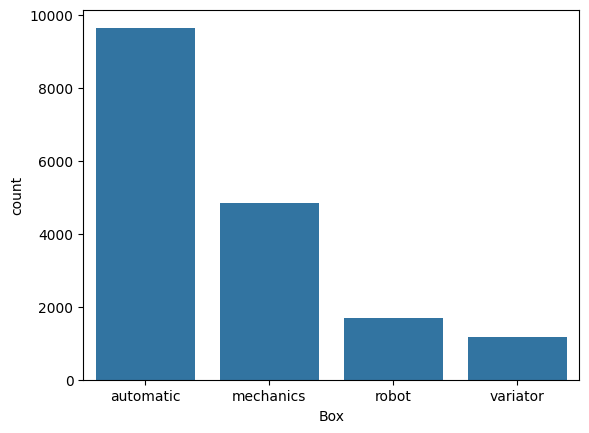

In [10]:
sns.countplot(x='Box', data=data_raw)
#data_raw['Box'].dtype

<Axes: xlabel='Drive_unit', ylabel='count'>

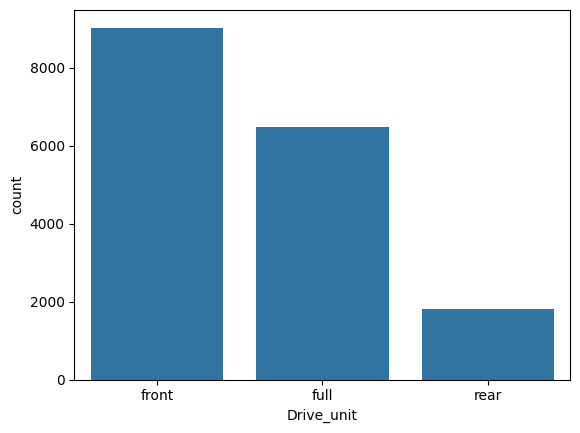

In [11]:
sns.countplot(x='Drive_unit', data=data_raw)
#data_raw['Drive_unit'].dtype

In [12]:
#sns.countplot(x='Country', data=data_raw)
data_raw['Country'].dtype

CategoricalDtype(categories=['China', 'Czech Republic', 'France', 'German', 'Iran',
                  'Italy', 'Japan', 'Russia', 'South Korea', 'Spain', 'Sweden',
                  'Taiwan', 'UK', 'USA', 'Ukraine'],
, ordered=False, categories_dtype=object)

<Axes: xlabel='Engine', ylabel='count'>

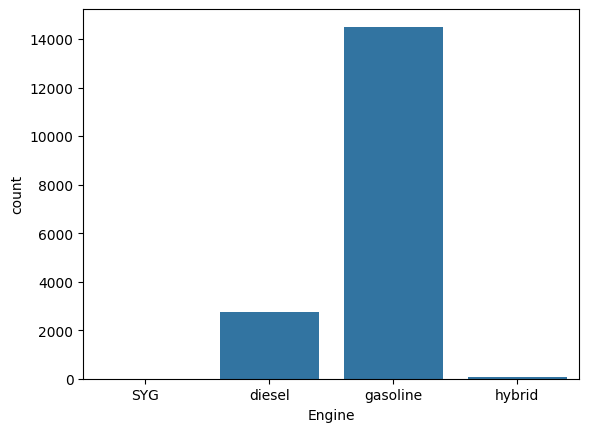

In [13]:
sns.countplot(x='Engine', data=data_raw)
#data_raw['Engine'].dtype

Информация о числовых признаках:

In [14]:
data_raw.describe()

,Mileage,Price,Year,Engine_volume,Maximum_power,Wheelbase,Torque,Volume_fuel_tank,Clearance,Maximum_speed,Speed_to_100,Release_start_series,End_Serial,Expense_city,Expense_track,Consumption_average
count,17336.000000,1.733600e+04,17336.000000,17336.000000,17336.000000,17336.000000,17336.000000,17336.000000,17336.000000,17336.000000,17336.000000,17336.000000,17336.000000,17336.000000,17336.000000,17336.000000
mean,133671.463083,1.321705e+06,2010.710775,2296.159091,182.517997,2729.347485,277.980215,63.330315,166.242732,199.462304,10.297297,2008.485060,2012.984022,10.969976,6.699810,8.294186
std,92443.517617,2.366522e+06,6.633431,1012.546654,101.790098,196.673796,156.105997,14.486203,32.128384,29.646279,3.042343,7.206854,6.080503,3.420671,1.778608,2.353262
min,0.000000,2.500000e+04,1958.000000,599.000000,45.000000,1812.000000,70.000000,22.000000,80.000000,115.000000,2.800000,1956.000000,1963.000000,3.100000,2.900000,3.000000
25%,70000.000000,4.200000e+05,2008.000000,1598.000000,115.000000,2608.000000,156.000000,52.000000,143.000000,180.000000,8.200000,2005.000000,2010.000000,8.700000,5.500000,6.700000
50%,124000.000000,7.270000e+05,2011.000000,1995.000000,150.000000,2700.000000,228.000000,60.000000,160.000000,194.000000,10.423527,2009.000000,2014.000000,10.200000,6.200000,7.700000
75%,183366.000000,1.420000e+06,2015.000000,2521.000000,218.000000,2840.000000,350.000000,70.000000,195.000000,219.000000,12.100000,2013.000000,2017.000000,12.700000,7.500000,9.400000
max,1000000.000000,1.300000e+08,2020.000000,6996.000000,720.000000,4085.000000,1000.000000,166.000000,300.000000,341.000000,35.000000,2020.000000,2020.000000,36.200000,21.100000,28.200000


Информация о категориальных признаках

In [15]:
data_raw.describe(include=['category'])

,mark,Box,Drive_unit,Country,Engine
count,17336,17336,17336,17336,17336
unique,70,4,3,15,4
top,Mercedes-Benz,automatic,front,German,gasoline
freq,1532,9640,9035,5400,14507


## 2. Визуализация, анализ, борьба с выбросами (outliers)

Цена может значительно зависить от мощности.
Построим поэтому диаграмму рассеивания для двух признаков: `Price` и `Maximum_power`.
<a id="part2"></a>

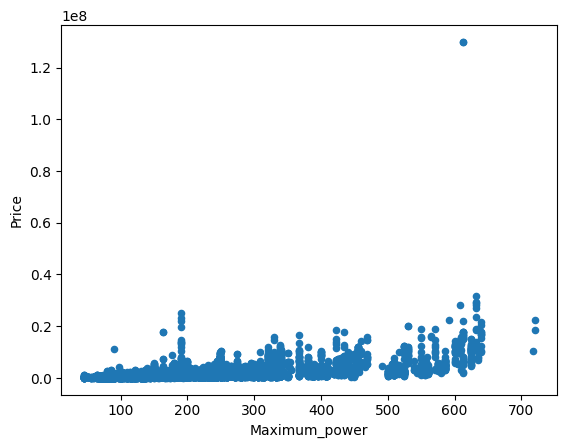

In [16]:
data_raw.plot(kind='scatter', x='Maximum_power', y='Price')
pass

Например заметны выбросы в `Price`. Избавимся от них.

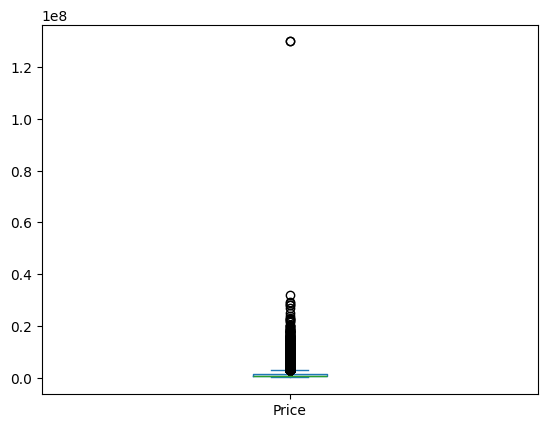

In [17]:
data_raw['Price'].plot(kind='box')
pass

Построим квантели

In [18]:
data_raw['Price'].quantile([0.005,.01,.05,.1,.5,.9,.95,.99,.995])

0.005       65000.0
0.010       80000.0
0.050      170000.0
0.100      250000.0
0.500      727000.0
0.900     2690000.0
0.950     4256525.0
0.990    10265884.8
0.995    12506077.5
Name: Price, dtype: float64

Мы видим, например, что $99\%$ всех значений признака `'Price'` находится в диапазоне от $65000$ до $12506077$ тыс. руб. (это значения квантилей, соответствующих уровням $0.005$ и $0.995$ соответственно)

Удалим все строки таблицы, в которых значения числовых признаков (в которых это имеет смысл) выходят за пределы квантилей $0.005$, $0.995$.

In [19]:
data = data_raw[
    (data_raw['Mileage'] <= data_raw['Mileage'].quantile(0.995)) &
    (data_raw['Price'] >= data_raw['Price'].quantile(0.005)) & (data_raw['Price'] <= data_raw['Price'].quantile(0.995)) &
    (data_raw['Year'] >= data_raw['Year'].quantile(0.005)) &
    (data_raw['Engine_volume'] >= data_raw['Engine_volume'].quantile(0.005)) & (data_raw['Engine_volume'] <= data_raw['Engine_volume'].quantile(0.995)) &
    (data_raw['Maximum_power'] >= data_raw['Maximum_power'].quantile(0.005)) & (data_raw['Maximum_power'] <= data_raw['Maximum_power'].quantile(0.995)) &
    (data_raw['Wheelbase'] >= data_raw['Wheelbase'].quantile(0.005)) & (data_raw['Wheelbase'] <= data_raw['Wheelbase'].quantile(0.995)) &
    (data_raw['Torque'] >= data_raw['Torque'].quantile(0.005)) & (data_raw['Torque'] <= data_raw['Torque'].quantile(0.995)) &
    (data_raw['Volume_fuel_tank'] >= data_raw['Volume_fuel_tank'].quantile(0.005)) & (data_raw['Volume_fuel_tank'] <= data_raw['Volume_fuel_tank'].quantile(0.995)) &
    (data_raw['Clearance'] >= data_raw['Clearance'].quantile(0.005)) & (data_raw['Clearance'] <= data_raw['Clearance'].quantile(0.995)) &
    (data_raw['Maximum_speed'] >= data_raw['Maximum_speed'].quantile(0.005)) & (data_raw['Maximum_speed'] <= data_raw['Maximum_speed'].quantile(0.995)) &
    (data_raw['Speed_to_100'] >= data_raw['Speed_to_100'].quantile(0.005)) & (data_raw['Speed_to_100'] <= data_raw['Speed_to_100'].quantile(0.995)) &
    (data_raw['Consumption_average'] >= data_raw['Consumption_average'].quantile(0.005)) & (data_raw['Consumption_average'] <= data_raw['Consumption_average'].quantile(0.995))
    ]
data.shape # Размер после удаления выбросов

(16256, 21)

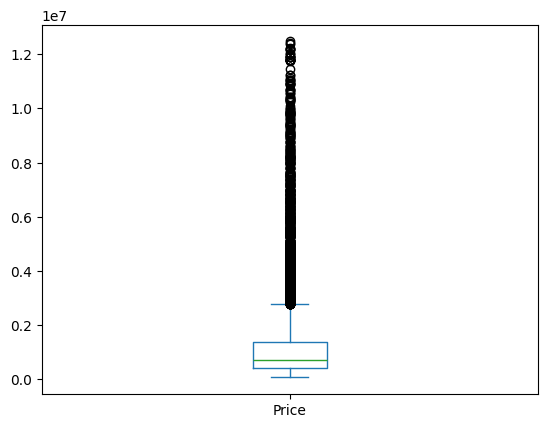

In [20]:
data['Price'].plot(kind='box')
pass

In [21]:
data.describe()

,Mileage,Price,Year,Engine_volume,Maximum_power,Wheelbase,Torque,Volume_fuel_tank,Clearance,Maximum_speed,Speed_to_100,Release_start_series,End_Serial,Expense_city,Expense_track,Consumption_average
count,16256.000000,1.625600e+04,16256.000000,16256.000000,16256.000000,16256.000000,16256.000000,16256.00000,16256.000000,16256.000000,16256.000000,16256.000000,16256.000000,16256.000000,16256.000000,16256.000000
mean,133761.899668,1.168895e+06,2011.019870,2232.812315,176.276329,2725.792015,269.789985,62.96506,166.010519,199.367281,10.258045,2008.855623,2013.227916,10.795226,6.600794,8.160587
std,86923.097871,1.387587e+06,5.719511,889.638220,86.210065,178.170185,140.642308,13.32579,30.302447,27.093264,2.699444,6.179685,5.306285,3.115269,1.621467,2.139356
min,0.000000,6.500000e+04,1982.000000,999.000000,64.000000,2250.000000,90.000000,35.00000,108.000000,135.000000,3.800000,1972.000000,1984.000000,4.600000,3.700000,4.200000
25%,73000.000000,4.250000e+05,2008.000000,1598.000000,117.000000,2610.000000,157.000000,53.00000,145.000000,180.000000,8.300000,2006.000000,2010.000000,8.700000,5.500000,6.700000
50%,126000.000000,7.170000e+05,2011.000000,1995.000000,150.000000,2700.000000,225.000000,60.00000,160.000000,194.000000,10.423527,2009.000000,2014.000000,10.100000,6.200000,7.700000
75%,183890.750000,1.365775e+06,2015.000000,2497.000000,211.000000,2825.000000,350.000000,70.00000,190.000000,217.000000,12.000000,2013.000000,2017.000000,12.400000,7.300000,9.200000
max,460000.000000,1.246770e+07,2020.000000,6162.000000,605.000000,3430.000000,850.000000,105.00000,259.000000,303.000000,21.700000,2020.000000,2020.000000,23.900000,14.700000,16.600000


In [22]:
data.describe(include=['category'])

,mark,Box,Drive_unit,Country,Engine
count,16256,16256,16256,16256,16256
unique,61,4,3,15,4
top,BMW,automatic,front,German,gasoline
freq,1308,9074,8748,4932,13591


График в целом соотносится с предположением, что чем больше мощность тем больше цена.

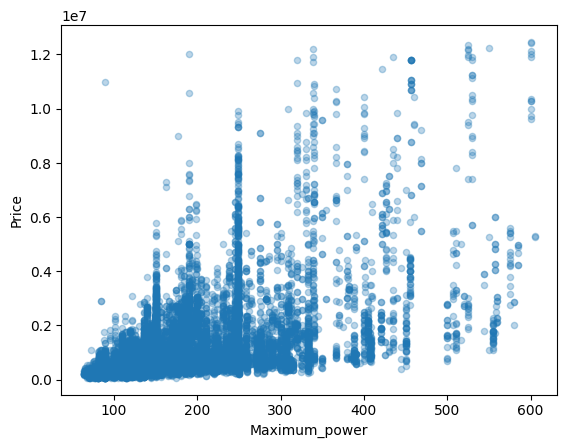

In [23]:
data.plot(kind = 'scatter', x = 'Maximum_power', y = 'Price', alpha=0.3)#
pass

График цены от пробега также соотносится с предположением.

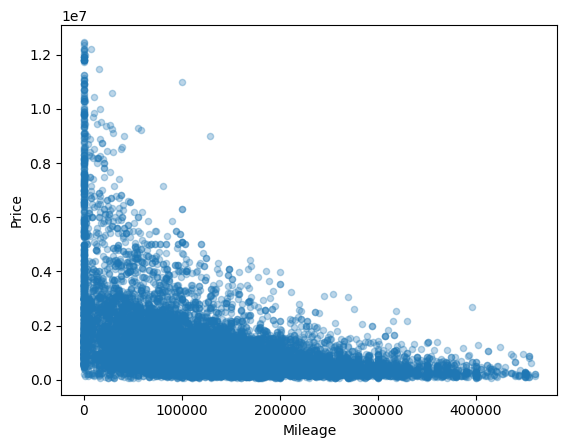

In [24]:
data.plot(kind = 'scatter', x = 'Mileage', y = 'Price', alpha=0.3)#
pass

Можно посмотреть диаграмму рассеивания с цветом маркеров соответствует типу двигателя `'Engine'`, а размер - расходу топлива `'Consumption_average'`:

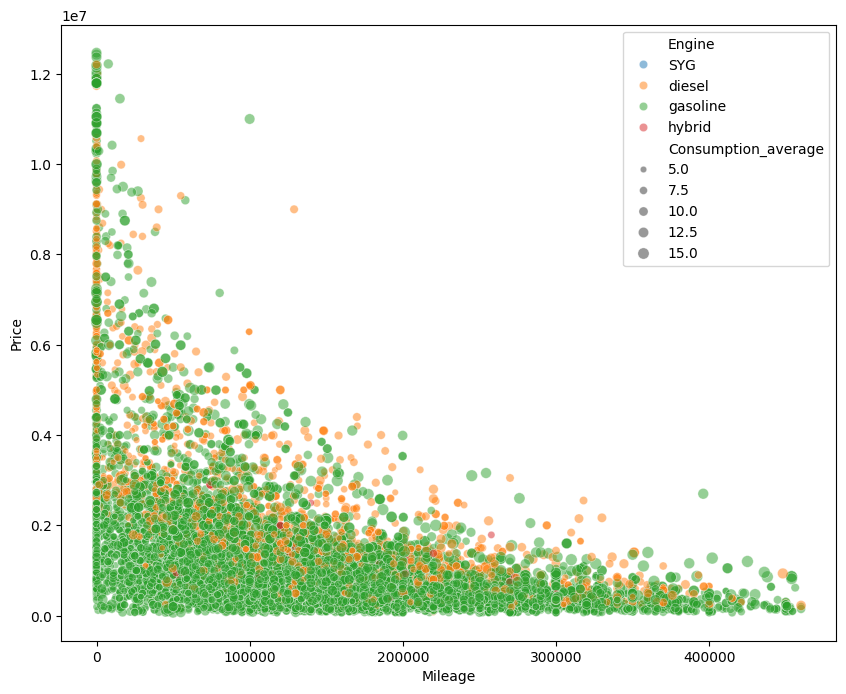

In [25]:
plt.figure(figsize = (10, 8))
sns.scatterplot(x='Mileage', y='Price', size='Consumption_average', hue='Engine', data=data, alpha=0.5)
pass

Можно заметить, что цена машин на дизельном топливе в целом выше.

Чтобы отследить корреляцию между количественными признаками вычислим матрицу корреляции

In [26]:
corr_mat = data.corr(numeric_only=True)
corr_mat

,Mileage,Price,Year,Engine_volume,Maximum_power,Wheelbase,Torque,Volume_fuel_tank,Clearance,Maximum_speed,Speed_to_100,Release_start_series,End_Serial,Expense_city,Expense_track,Consumption_average
Mileage,1.000000,-0.464840,-0.734019,0.080865,-0.089278,-0.044793,-0.109271,0.165950,-0.125244,-0.061189,0.134629,-0.678273,-0.698481,0.277141,0.210552,0.249274
Price,-0.464840,1.000000,0.522074,0.386052,0.562181,0.494929,0.645372,0.339095,0.233184,0.404923,-0.472365,0.504587,0.483766,0.010512,0.142390,0.076290
Year,-0.734019,0.522074,1.000000,-0.063004,0.129902,0.196553,0.196379,-0.090184,0.207139,0.101648,-0.197681,0.946381,0.947679,-0.349501,-0.266032,-0.319975
Engine_volume,0.080865,0.386052,-0.063004,1.000000,0.864219,0.597177,0.778493,0.778310,0.282911,0.504029,-0.588372,-0.037177,-0.065623,0.748863,0.756897,0.771248
Maximum_power,-0.089278,0.562181,0.129902,0.864219,1.000000,0.620607,0.864997,0.678391,0.153084,0.740839,-0.798163,0.165330,0.114854,0.589145,0.575829,0.593400
Wheelbase,-0.044793,0.494929,0.196553,0.597177,0.620607,1.000000,0.713559,0.716629,0.138887,0.479767,-0.448504,0.209221,0.193141,0.310954,0.371320,0.349500
Torque,-0.109271,0.645372,0.196379,0.778493,0.864997,0.713559,1.000000,0.727755,0.262870,0.636127,-0.693263,0.216957,0.181886,0.358811,0.440662,0.404516
Volume_fuel_tank,0.165950,0.339095,-0.090184,0.778310,0.678391,0.716629,0.727755,1.000000,0.358692,0.408811,-0.423103,-0.064687,-0.089240,0.606110,0.664000,0.649228
Clearance,-0.125244,0.233184,0.207139,0.282911,0.153084,0.138887,0.262870,0.358692,1.000000,-0.256401,0.056822,0.176920,0.204630,0.223519,0.425316,0.328394
Maximum_speed,-0.061189,0.404923,0.101648,0.504029,0.740839,0.479767,0.636127,0.408811,-0.256401,1.000000,-0.883817,0.164873,0.075469,0.264764,0.141866,0.204513


Удобно использовать визуальный образ этой матрицы. Чем ярче ячейка, тем больше по абсолютной величине коэффициент корреляции:

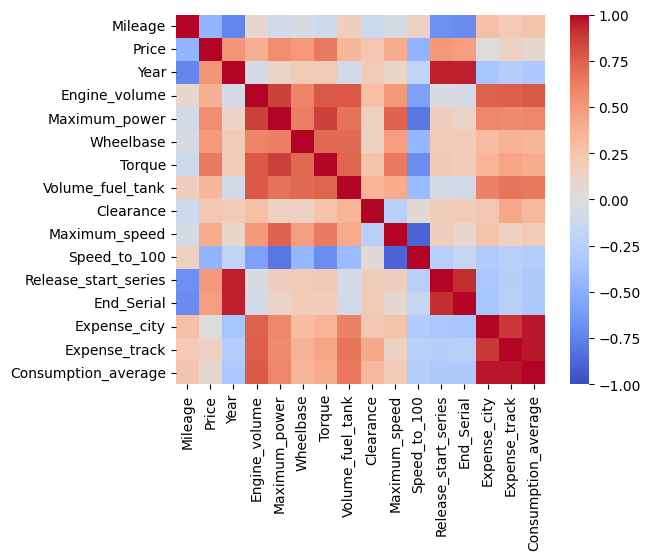

In [27]:
sns.heatmap(corr_mat, square=True, vmin=-1, vmax=1, cmap='coolwarm')
pass

Выведем коэффициенты корреляции, по модулю большие заданного значения 0.45:

In [28]:
abs(corr_mat) >= 0.45

,Mileage,Price,Year,Engine_volume,Maximum_power,Wheelbase,Torque,Volume_fuel_tank,Clearance,Maximum_speed,Speed_to_100,Release_start_series,End_Serial,Expense_city,Expense_track,Consumption_average
Mileage,True,True,True,False,False,False,False,False,False,False,False,True,True,False,False,False
Price,True,True,True,False,True,True,True,False,False,False,True,True,True,False,False,False
Year,True,True,True,False,False,False,False,False,False,False,False,True,True,False,False,False
Engine_volume,False,False,False,True,True,True,True,True,False,True,True,False,False,True,True,True
Maximum_power,False,True,False,True,True,True,True,True,False,True,True,False,False,True,True,True
Wheelbase,False,True,False,True,True,True,True,True,False,True,False,False,False,False,False,False
Torque,False,True,False,True,True,True,True,True,False,True,True,False,False,False,False,False
Volume_fuel_tank,False,False,False,True,True,True,True,True,False,False,False,False,False,True,True,True
Clearance,False,False,False,False,False,False,False,False,True,False,False,False,False,False,False,False
Maximum_speed,False,False,False,True,True,True,True,False,False,True,True,False,False,False,False,False


In [29]:
#np.triu(corr_mat, k=1)

Представим в более удобном виде

In [30]:
corr_mat.where(np.triu(abs(corr_mat) > 0.45, k=1)).stack()#.sort_values(ascending=False)

Mileage               Price                  -0.464840
                      Year                   -0.734019
                      Release_start_series   -0.678273
                      End_Serial             -0.698481
Price                 Year                    0.522074
                      Maximum_power           0.562181
                      Wheelbase               0.494929
                      Torque                  0.645372
                      Speed_to_100           -0.472365
                      Release_start_series    0.504587
                      End_Serial              0.483766
Year                  Release_start_series    0.946381
                      End_Serial              0.947679
Engine_volume         Maximum_power           0.864219
                      Wheelbase               0.597177
                      Torque                  0.778493
                      Volume_fuel_tank        0.778310
                      Maximum_speed           0.504029
          

Из этих данных можно заметить, что Price сильно зависит от Year, Maximum_power, Wheelbase, Release_start_series, End_Serial, Torque, Speed_to_100, Mileage.     
Причем чем больше Year, Maximum_power, Wheelbase, Torque, Release_start_series, End_Serial, тем больше цена.    
И чем меньше Speed_to_100, Mileage, тем больше цена.   
Всё это соответствует ожиданиям.  
    
Но неожиданно, что цена слабо зависит от максимальной скорости и почти не зависит от расхода топлива.  
Построим эти графики.    
И из них видно, что цена действительно почти не зависит от расхода топлива, а в случае максимальной скорости явная зависимость наблюдается, только до значения 250 км/ч.

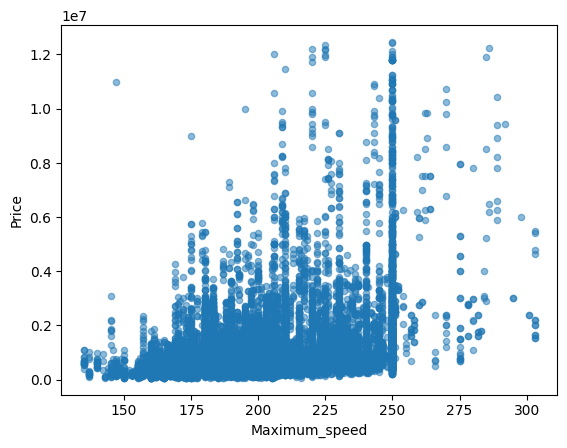

In [31]:
data.plot(kind = 'scatter', x = 'Maximum_speed', y = 'Price', alpha=0.5)
pass

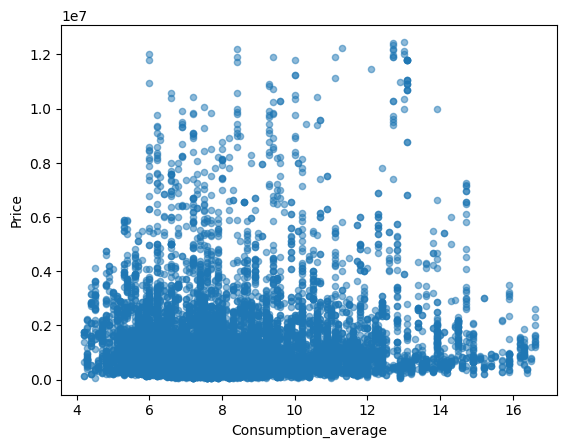

In [32]:
data.plot(kind = 'scatter', x = 'Consumption_average', y = 'Price', alpha=0.5)
pass

В случае категориальных признаков из графиков ниже было замечено, что:    
- цена не сильно зависит от марки;
- машины с автоматической коробкой передач стоят дороже, а механика дешевле;
- машины с полным приводом стоят дороже;
- машины из Германии и США стоят дороже;
- машины на дизелном топливе стоят дороже;

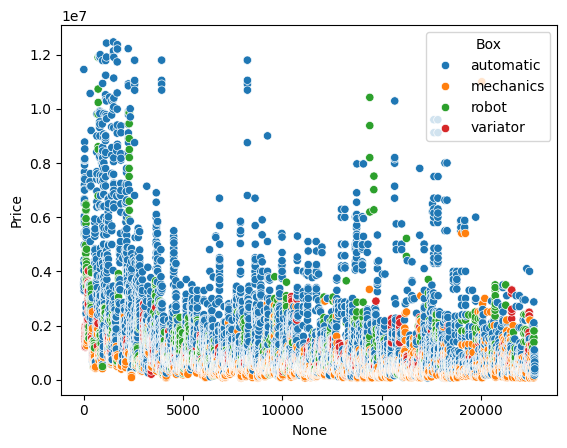

In [33]:
sns.scatterplot(data=data, x=data.index, y='Price', hue='Box')
pass

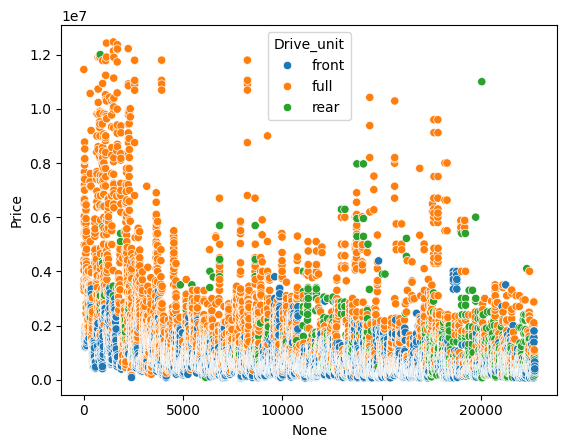

In [34]:
sns.scatterplot(data=data, x=data.index, y='Price', hue='Drive_unit')
pass

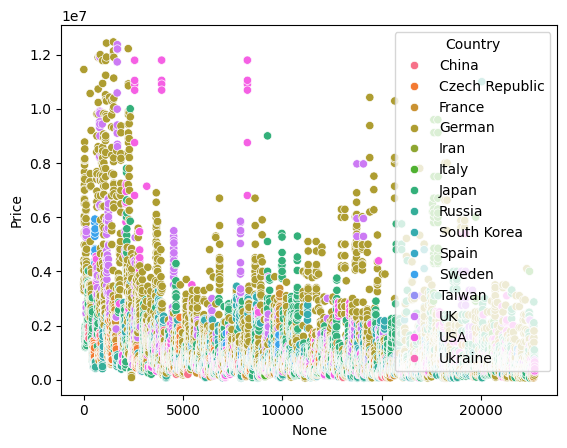

In [35]:
sns.scatterplot(data=data, x=data.index, y='Price', hue='Country')
pass

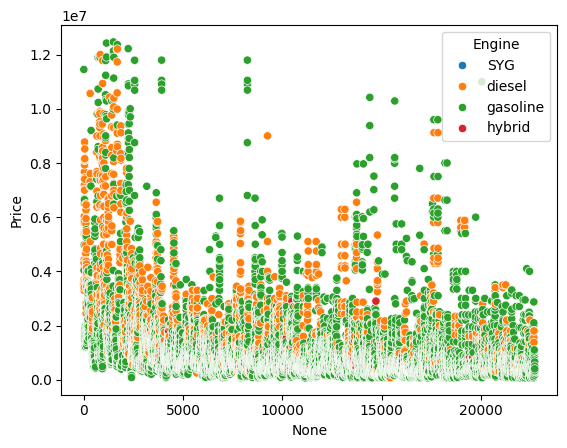

In [36]:
sns.scatterplot(data=data, x=data.index, y='Price', hue='Engine')
pass

Также заметим, что некоторые величины сильно коррелируют между собой

In [37]:
corr_mat.where(np.triu(np.abs(corr_mat) > 0.5, k=1)).stack().sort_values(ascending=False)

Expense_track         Consumption_average     0.965202
Expense_city          Consumption_average     0.964711
Year                  End_Serial              0.947679
                      Release_start_series    0.946381
Release_start_series  End_Serial              0.914805
Expense_city          Expense_track           0.883998
Maximum_power         Torque                  0.864997
Engine_volume         Maximum_power           0.864219
                      Torque                  0.778493
                      Volume_fuel_tank        0.778310
                      Consumption_average     0.771248
                      Expense_track           0.756897
                      Expense_city            0.748863
Maximum_power         Maximum_speed           0.740839
Torque                Volume_fuel_tank        0.727755
Wheelbase             Volume_fuel_tank        0.716629
                      Torque                  0.713559
Maximum_power         Volume_fuel_tank        0.678391
Volume_fue

Явно выделяются две группы:  
- Year, Release_start_series, End_Serial;   
- Consumption_average, Expense_city, Expense_track.   
  
Это легко объяснить:   
- Год продажи всегда больше года начала выпуска в серию, и как правило меньше окончания выпуска.  
- А Consumption_average примерно равен (Expense_city + Expense_track)/2   

Следоватеольно можем оставить для расмотрения, только Year и Consumption_average.

In [38]:
data = data.drop('Release_start_series', axis=1)
data = data.drop('End_Serial', axis=1)
data = data.drop('Expense_city', axis=1)
data = data.drop('Expense_track', axis=1)

data.shape #Размер после уменьшения кол-ва признаков

(16256, 17)

## 3. Обучающая и тестовая выборки

Для предсказания цены машины будем использовать все входные признаки, кроме mark.
<a id="part3"></a>

Разобьем данные на обучающую и тестовую выборки в пропорции 3:1 (75% - обучающая выборка, 25% - тестовая):

In [39]:
from sklearn.model_selection import train_test_split

X = data.drop(['Price', 'mark'], axis=1)
y = data['Price']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.25, random_state = 42)

N_train, _ = X_train.shape
N_test,  _ = X_test.shape

N_train, N_test

(12192, 4064)

## 4. Бинаризация номинальных признаков
<a id="part4"></a>

К категориалным признакам применим метод *бинаризации* (*one-hot encoding*).

In [40]:
from sklearn.preprocessing import OneHotEncoder
enc = OneHotEncoder(drop='if_binary', sparse_output=False)
enc.fit(X_train[['Box', 'Drive_unit', 'Country', 'Engine']])#'mark', 

OneHotEncoder(drop='if_binary', sparse_output=False)

In [41]:
dummies = pd.DataFrame(enc.transform(X_train[['Box', 'Drive_unit', 'Country', 'Engine']]), 
                       columns=enc.get_feature_names_out(), index=X_train.index)
dummies.head()

,Box_automatic,Box_mechanics,Box_robot,Box_variator,Drive_unit_front,Drive_unit_full,Drive_unit_rear,Country_China,Country_Czech Republic,Country_France,...,Country_Spain,Country_Sweden,Country_Taiwan,Country_UK,Country_USA,Country_Ukraine,Engine_SYG,Engine_diesel,Engine_gasoline,Engine_hybrid
7192,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0
3616,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
15289,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
14643,0.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
14603,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0


In [42]:
X_train = pd.concat((X_train, dummies), axis=1).drop(['Box', 'Drive_unit', 'Country', 'Engine'], axis=1)

In [43]:
X_train.head()

,Mileage,Year,Engine_volume,Maximum_power,Wheelbase,Torque,Volume_fuel_tank,Clearance,Maximum_speed,Speed_to_100,...,Country_Spain,Country_Sweden,Country_Taiwan,Country_UK,Country_USA,Country_Ukraine,Engine_SYG,Engine_diesel,Engine_gasoline,Engine_hybrid
7192,280000.0,2014.0,1997.0,140.0,2850.0,320.0,70.0,150.0,193.0,10.5,...,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0
3616,117406.0,2014.0,3604.0,400.0,2807.0,550.0,75.0,205.0,266.0,4.8,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
15289,90000.0,2013.0,2356.0,180.0,2775.0,228.0,65.0,146.0,214.0,10.1,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
14643,185000.0,2008.0,1798.0,160.0,2808.0,250.0,65.0,160.0,218.0,8.9,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
14603,5131.0,2020.0,2995.0,354.0,2807.0,480.0,65.0,205.0,254.0,5.3,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0


## 5. Масштабирование количественных признаков
Выполним нормализацию всех признаков:
<a id="part5"></a>

In [44]:
#from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import Normalizer
scaler = Normalizer()#StandardScaler()
scaler.fit(X_train)
X_train = pd.DataFrame(scaler.transform(X_train), columns=X_train.columns, index=X_train.index)

In [45]:
X_train.describe()

,Mileage,Year,Engine_volume,Maximum_power,Wheelbase,Torque,Volume_fuel_tank,Clearance,Maximum_speed,Speed_to_100,...,Country_Spain,Country_Sweden,Country_Taiwan,Country_UK,Country_USA,Country_Ukraine,Engine_SYG,Engine_diesel,Engine_gasoline,Engine_hybrid
count,12192.000000,12192.000000,12192.000000,12192.000000,12192.000000,12192.000000,12192.000000,12192.000000,12192.000000,12192.000000,...,1.219200e+04,1.219200e+04,1.219200e+04,12192.000000,12192.000000,1.219200e+04,1.219200e+04,12192.000000,12192.000000,1.219200e+04
mean,0.928728,0.057012,0.060336,0.005151,0.077754,0.008313,0.001699,0.004970,0.005692,0.000276,...,2.035934e-08,2.834293e-07,1.322122e-08,0.000002,0.000001,8.369977e-09,2.753958e-09,0.000006,0.000023,1.464211e-08
std,0.248337,0.124710,0.131775,0.012106,0.170067,0.020648,0.003647,0.011326,0.012451,0.000626,...,4.206487e-07,6.039097e-06,5.457310e-07,0.000016,0.000009,3.158028e-07,2.027095e-07,0.000030,0.000056,3.454126e-07
min,0.000000,0.004330,0.003163,0.000171,0.005666,0.000259,0.000114,0.000257,0.000315,0.000014,...,0.000000e+00,0.000000e+00,0.000000e+00,0.000000,0.000000,0.000000e+00,0.000000e+00,0.000000,0.000000,0.000000e+00
25%,0.998403,0.010917,0.010894,0.000788,0.014752,0.001134,0.000334,0.000860,0.001062,0.000052,...,0.000000e+00,0.000000e+00,0.000000e+00,0.000000,0.000000,0.000000e+00,0.000000e+00,0.000000,0.000004,0.000000e+00
50%,0.999486,0.015924,0.016628,0.001266,0.021436,0.001879,0.000490,0.001297,0.001556,0.000082,...,0.000000e+00,0.000000e+00,0.000000e+00,0.000000,0.000000,0.000000e+00,0.000000e+00,0.000000,0.000007,0.000000e+00
75%,0.999757,0.027380,0.031157,0.002553,0.036834,0.003912,0.000846,0.002290,0.002741,0.000141,...,0.000000e+00,0.000000e+00,0.000000e+00,0.000000,0.000000,0.000000e+00,0.000000e+00,0.000000,0.000012,0.000000e+00
max,0.999967,0.593359,0.859665,0.104028,0.765594,0.159368,0.020169,0.057464,0.065701,0.004393,...,1.636657e-05,2.414434e-04,4.669838e-05,0.000262,0.000215,1.814541e-05,1.994558e-05,0.000267,0.000294,1.750785e-05


# Обучаем модели

## 6. Линейная регрессия
<a id="part6"></a>

In [46]:
from sklearn.linear_model import LinearRegression

model = LinearRegression()
model.fit(X_train, y_train)

LinearRegression()

In [47]:
y_train_predict = model.predict(X_train)

In [48]:
model.coef_

array([ 6.25697280e+06,  1.00334532e+09,  8.42846438e+06,  9.50387298e+07,
        1.39573326e+07,  2.90886196e+07,  1.20046854e+08,  3.28865973e+07,
       -8.34843166e+07,  6.20244285e+08, -1.72635055e+09, -5.75363185e+11,
       -5.74420012e+11, -5.76080167e+11, -5.76222917e+11, -7.67951187e+11,
       -7.68277904e+11, -7.65857190e+11, -1.43480735e+11, -1.39853549e+11,
       -1.42542205e+11, -1.36821122e+11, -2.35675993e+11, -1.34909989e+11,
       -1.43295923e+11, -1.41146703e+11, -1.43348045e+11, -1.57866573e+11,
       -1.43126791e+11, -1.66270803e+11, -1.36562859e+11, -1.42869992e+11,
       -1.94315000e+11, -5.95403176e+11, -5.83306829e+11, -5.77224422e+11,
       -5.46151853e+11])

In [49]:
y_train

7192      460000.0
3616     2369000.0
15289    1375000.0
14643     650000.0
14603    6270000.0
           ...    
17026     170000.0
7063      230000.0
1325     3200000.0
21835     650000.0
9254     2650000.0
Name: Price, Length: 12192, dtype: float64

In [50]:
y_train_predict

array([ 767081.75560699, 1239612.5554001 ,  950779.76371413, ...,
       3505149.30834177,  746997.55434583, 1058162.99898378])

In [51]:
RSS = ((y_train_predict - y_train)**2).sum()
RSS/N_train, (RSS/N_train)**.5

(573073890203.6824, 757016.4398503393)

In [52]:
# One-hot encoding:
dummies = pd.DataFrame(enc.transform(X_test[['Box', 'Drive_unit', 'Country', 'Engine']]),
                       columns=enc.get_feature_names_out(), index=X_test.index)
X_test = pd.concat((X_test, dummies), axis=1).drop(['Box', 'Drive_unit', 'Country', 'Engine'], axis=1)

# Масштабирование:
X_test = pd.DataFrame(scaler.transform(X_test),
                      columns=X_test.columns, index=X_test.index)

In [53]:
y_train_predict = model.predict(X_train)
y_test_predict  = model.predict(X_test)

### Измеряем метрики качества

*Остаточная сумма квадратов* (*residual sum of squares*):
$$
{\rm RSS} = \sum_{i=1}^N \left(y^{(i)} - \widehat{y}^{(i)} \right)^2
$$
где
$$
\widehat{y}^{(i)} = \beta_0 + \sum_{j=1}^d \beta_j x_j^{(i)}
$$

*Полная сумма квадратов*:
$$
{\rm TSS} = \sum_{i=1}^N \left(y^{(i)} - \overline{y} \right)^2,
$$
где
$$
\overline{y} = \frac{1}{N} \sum_{i=1}^N y^{(i)}
$$

$$
\overline{y} = \beta_0 + \sum_{j=1}^d \beta_j \overline{x}_j
$$


*Сумма квадратов, обусловленная регрессией*:
$$
{\rm ESS} = \sum_{i=1}^N \left(\overline{y} - \widehat{y}^{(i)} \right)^2
$$

Можно показать, что
$$
{\rm TSS} = {\rm RSS} + {\rm ESS}
$$

*Коэффициент детерминации*, или *коэффициент регрессии Пирсона*:
$$
R^2 = 1 - \frac{{\rm RSS}}{{\rm TSS}} = \frac{{\rm ESS}}{{\rm TSS}}
$$
— доля объясняемого регрессией разброса относительно среднего (чем ближе к 1, тем модель лучше объясняет данные).

$$
0 \le R^2 \le 1
$$

$R = \sqrt{R^2}$ равно (по модулю) выборочной корреляции между $y^{(i)}$ и $\widehat{y}^{(i)}$

Если $d = 1$, то $R$ равен (по модулю) выборочной корреляции между $y^{(i)}$ и $x^{(i)}$.

*Средняя сумма квадратов отклонений* (MSE - Mean Squared Error)
$$
{\rm MSE} = \frac{1}{N} {\rm RSS} = \frac{1}{N} \sum_{i=1}^N \left(y^{(i)} - \widehat{y}^{(i)} \right)^2
$$

*Среднеквадратическая ошибка* (RMSE - Rooted Mean Squared Error)
$$
{\rm RMSE} = \sqrt{{\rm MSE}}
$$

MSE иногда называют *средней квадратической ошибкой*, что, конечно же, правильней отражает суть дела, но добавляет путаницы.

Для вычисления этих метрик можно воспользоваться соответствующими функциями из модуля `metrics` библиотеки `sklearn`, но можно также вычислить "вручную". Значение $R^2$ также вычисляет метод `score` объекта `LinearRegression`

In [54]:
from sklearn.metrics import mean_squared_error, r2_score

MSE_train = mean_squared_error(y_train, y_train_predict)
MSE_test  = mean_squared_error(y_test,  y_test_predict)
R2_train = r2_score(y_train, y_train_predict)
R2_test  = r2_score(y_test,  y_test_predict)

MSE_train, MSE_test, R2_train, R2_test

(573073890203.6824, 560783311348.3636, 0.7059704625223314, 0.6975123289032985)

In [55]:
model.score(X_train, y_train) # Коэффициент детерминации R^2_train

0.7059704625223314

In [56]:
model.score(X_test, y_test)

0.6975123289032985

In [57]:
MSE_train = ((y_train_predict - y_train)**2).mean()
MSE_test  = ((y_test_predict - y_test)**2).mean()
MSE_train, MSE_test

(573073890203.6824, 560783311348.3636)

In [58]:
RMSE_train = (MSE_train)**(.5)
RMSE_test = (MSE_test)**(.5)
RMSE_train, RMSE_test

(757016.4398503393, 748854.6663728307)

In [59]:
RMSE_table = pd.DataFrame(columns=('train', 'test'))
RMSE_table.loc['Linear Regression, all features', :] = (RMSE_train, RMSE_test)

In [60]:
RMSE_table

,train,test
"Linear Regression, all features",757016.43985,748854.666373


In [61]:
R2_table = pd.DataFrame(columns=('train', 'test'))
R2_table.loc['Linear Regression, all features', :] = (R2_train, R2_test)
R2_table

,train,test
"Linear Regression, all features",0.70597,0.697512


### Если предсказывать цену только по признакам с наибольшой корреляцией?

Попробуем построить линейную модель, описывающую зависимость `Price` только от Year, Maximum_power, Torque, Speed_to_100, Mileage

In [62]:
model = LinearRegression()
model.fit(X_train[['Year', 'Maximum_power', 'Torque', 'Speed_to_100', 'Mileage']], y_train)

y_train_predict = model.predict(X_train[['Year', 'Maximum_power', 'Torque', 'Speed_to_100', 'Mileage']])
y_test_predict  = model.predict(X_test[['Year', 'Maximum_power', 'Torque', 'Speed_to_100', 'Mileage']])

In [63]:
RMSE_train = mean_squared_error(y_train, y_train_predict)**.5
RMSE_test  = mean_squared_error(y_test,  y_test_predict)**.5

In [64]:
RMSE_table.loc['Linear Regression, Max', :] = (RMSE_train, RMSE_test)
RMSE_table

,train,test
"Linear Regression, all features",757016.43985,748854.666373
"Linear Regression, Max",809080.524029,789243.356071


In [65]:
R2_train = r2_score(y_train, y_train_predict)
R2_test  = r2_score(y_test,  y_test_predict)
R2_table.loc['Linear Regression, Max', :] = (R2_train, R2_test)
R2_table

,train,test
"Linear Regression, all features",0.70597,0.697512
"Linear Regression, Max",0.664136,0.664004


Можно заметить, что результат ухудшился, но совсем на немного. Значит, действительно, данные признаки имеют ключевую роль.

## 7. Метод $k$ ближайших соседей ($k$ NN, $k$ nearest neighbours)
<a id="part7"></a>

In [66]:
from sklearn.neighbors import KNeighborsRegressor

model = KNeighborsRegressor(n_neighbors=3)
model.fit(X_train, y_train)

KNeighborsRegressor(n_neighbors=3)

Количество соседей равное 3-м даёт наилучший результат

In [67]:
y_train_predict = model.predict(X_train)
y_test_predict  = model.predict(X_test)

In [68]:
RMSE_train = mean_squared_error(y_train, y_train_predict)**.5
RMSE_test  = mean_squared_error(y_test,  y_test_predict)**.5
R2_train = r2_score(y_train, y_train_predict)
R2_test  = r2_score(y_test,  y_test_predict)

In [69]:
RMSE_table.loc['k Nearest Neighbours', :] = (RMSE_train, RMSE_test)
RMSE_table

,train,test
"Linear Regression, all features",757016.43985,748854.666373
"Linear Regression, Max",809080.524029,789243.356071
k Nearest Neighbours,389214.85232,585921.927731


In [70]:
R2_table.loc['k Nearest Neighbours', :] = (R2_train, R2_test)
R2_table

,train,test
"Linear Regression, all features",0.70597,0.697512
"Linear Regression, Max",0.664136,0.664004
k Nearest Neighbours,0.922275,0.814821


## 8. Случайный лес (Random Forest)
<a id="part8"></a>

In [71]:
from sklearn.ensemble import RandomForestRegressor

model = RandomForestRegressor(n_estimators=200) # по умолчанию n_estimators=100
model.fit(X_train, y_train)

RandomForestRegressor(n_estimators=200)

In [72]:
y_train_predict = model.predict(X_train)
y_test_predict  = model.predict(X_test)

In [73]:
RMSE_train = mean_squared_error(y_train, y_train_predict)**.5
RMSE_test  = mean_squared_error(y_test,  y_test_predict)**.5
R2_train = r2_score(y_train, y_train_predict)
R2_test  = r2_score(y_test,  y_test_predict)

In [74]:
RMSE_table.loc['Random Forest', :] = (RMSE_train, RMSE_test)
RMSE_table

,train,test
"Linear Regression, all features",757016.43985,748854.666373
"Linear Regression, Max",809080.524029,789243.356071
k Nearest Neighbours,389214.85232,585921.927731
Random Forest,169867.186156,463902.060202


In [75]:
R2_table.loc['Random Forest', :] = (R2_train, R2_test)
R2_table

,train,test
"Linear Regression, all features",0.70597,0.697512
"Linear Regression, Max",0.664136,0.664004
k Nearest Neighbours,0.922275,0.814821
Random Forest,0.985195,0.883918


Метод Random Forest позволяет получить некоторые оценки "*важности*" признаков.
Чем значение больше, тем признак важнее.

In [76]:
importances = model.feature_importances_
importances

array([5.24421766e-03, 7.60594311e-03, 1.44251373e-01, 4.36728061e-02,
       9.16969060e-03, 1.99379218e-01, 1.30775473e-02, 1.33399508e-02,
       1.24865507e-02, 2.43097339e-02, 2.01287701e-02, 7.73055528e-03,
       9.94061383e-03, 1.05341256e-03, 5.38495799e-04, 1.79272614e-02,
       4.26170118e-01, 1.61620180e-03, 2.37892343e-04, 1.11635058e-04,
       3.47070509e-04, 5.61935124e-03, 2.55374693e-06, 7.96802498e-04,
       6.23820647e-03, 1.06479953e-03, 2.97235430e-03, 1.27606644e-05,
       1.88042225e-04, 9.01836114e-06, 3.48062023e-03, 7.24996598e-04,
       4.55537579e-06, 1.96215326e-06, 3.62890346e-03, 1.68861875e-02,
       2.98290706e-05])

In [77]:
np.sum(importances)

0.9999999999999999

In [78]:
importances = pd.Series(model.feature_importances_, index=X_train.columns).sort_values(ascending=False)
importances

Drive_unit_full           0.426170
Torque                    0.199379
Engine_volume             0.144251
Maximum_power             0.043673
Speed_to_100              0.024310
Consumption_average       0.020129
Drive_unit_front          0.017927
Engine_gasoline           0.016886
Clearance                 0.013340
Volume_fuel_tank          0.013078
Maximum_speed             0.012487
Box_mechanics             0.009941
Wheelbase                 0.009170
Box_automatic             0.007731
Year                      0.007606
Country_Japan             0.006238
Country_German            0.005619
Mileage                   0.005244
Engine_diesel             0.003629
Country_UK                0.003481
Country_South Korea       0.002972
Drive_unit_rear           0.001616
Country_Russia            0.001065
Box_robot                 0.001053
Country_Italy             0.000797
Country_USA               0.000725
Box_variator              0.000538
Country_France            0.000347
Country_China       

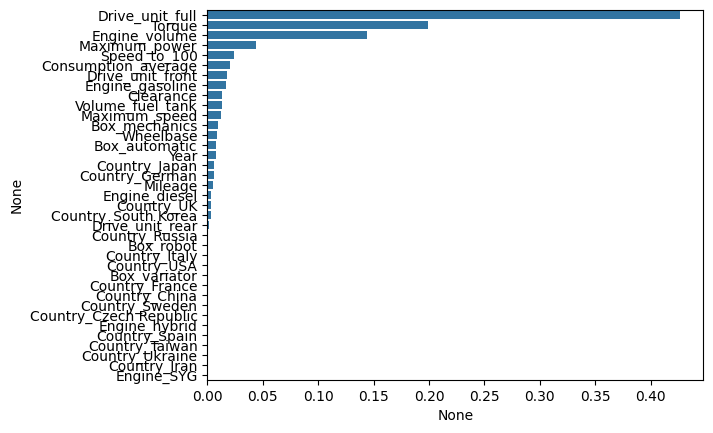

In [79]:
sns.barplot(y=importances.index, x=importances, orient="h")
pass

Данный метод как правило даёт лучший результат для подобных задач, что подтверждается данным экспериментом.  
Также оказалось, что наличие полного привода вносит более значительный вклад в цену, чем я предполагал ранее.

## 9. Градиентный бустинг (Gradient Boosting)
<a id="part9"></a>

In [80]:
from sklearn.ensemble import GradientBoostingRegressor

model = GradientBoostingRegressor(n_estimators=200) # по умолчанию n_estimators=100
model.fit(X_train, y_train)

GradientBoostingRegressor(n_estimators=200)

In [81]:
y_train_predict = model.predict(X_train)
y_test_predict  = model.predict(X_test)

In [82]:
RMSE_train = mean_squared_error(y_train, y_train_predict)**.5
RMSE_test  = mean_squared_error(y_test,  y_test_predict)**.5
R2_train = r2_score(y_train, y_train_predict)
R2_test  = r2_score(y_test,  y_test_predict)

In [83]:
RMSE_table.loc['Gradient Boosting', :] = (RMSE_train, RMSE_test)
RMSE_table

,train,test
"Linear Regression, all features",757016.43985,748854.666373
"Linear Regression, Max",809080.524029,789243.356071
k Nearest Neighbours,389214.85232,585921.927731
Random Forest,169867.186156,463902.060202
Gradient Boosting,437352.237427,525933.257887


In [84]:
R2_table.loc['Gradient Boosting', :] = (R2_train, R2_test)
R2_table

,train,test
"Linear Regression, all features",0.70597,0.697512
"Linear Regression, Max",0.664136,0.664004
k Nearest Neighbours,0.922275,0.814821
Random Forest,0.985195,0.883918
Gradient Boosting,0.901861,0.850798


In [85]:
importances = model.feature_importances_
importances

array([6.63248826e-04, 1.35923891e-02, 8.78342222e-02, 7.10152772e-02,
       3.14087944e-03, 3.94313965e-01, 4.56440762e-03, 2.77533248e-03,
       4.87179112e-03, 4.15886079e-02, 5.45408350e-03, 8.05336200e-03,
       1.09054559e-02, 4.62011062e-04, 1.75439953e-04, 2.19688461e-02,
       2.86799314e-01, 1.21846926e-03, 3.76682565e-04, 1.41268465e-05,
       1.98867070e-05, 1.14580264e-02, 0.00000000e+00, 2.18044002e-03,
       1.79041631e-03, 1.22004897e-03, 3.17727238e-03, 0.00000000e+00,
       1.85242897e-04, 1.33300111e-04, 7.03507194e-03, 1.04802854e-04,
       0.00000000e+00, 0.00000000e+00, 5.07467813e-03, 7.83290062e-03,
       0.00000000e+00])

In [86]:
importances = pd.Series(model.feature_importances_, index=X_train.columns).sort_values(ascending=False)
importances

Torque                    0.394314
Drive_unit_full           0.286799
Engine_volume             0.087834
Maximum_power             0.071015
Speed_to_100              0.041589
Drive_unit_front          0.021969
Year                      0.013592
Country_German            0.011458
Box_mechanics             0.010905
Box_automatic             0.008053
Engine_gasoline           0.007833
Country_UK                0.007035
Consumption_average       0.005454
Engine_diesel             0.005075
Maximum_speed             0.004872
Volume_fuel_tank          0.004564
Country_South Korea       0.003177
Wheelbase                 0.003141
Clearance                 0.002775
Country_Italy             0.002180
Country_Japan             0.001790
Country_Russia            0.001220
Drive_unit_rear           0.001218
Mileage                   0.000663
Box_robot                 0.000462
Country_China             0.000377
Country_Sweden            0.000185
Box_variator              0.000175
Country_Taiwan      

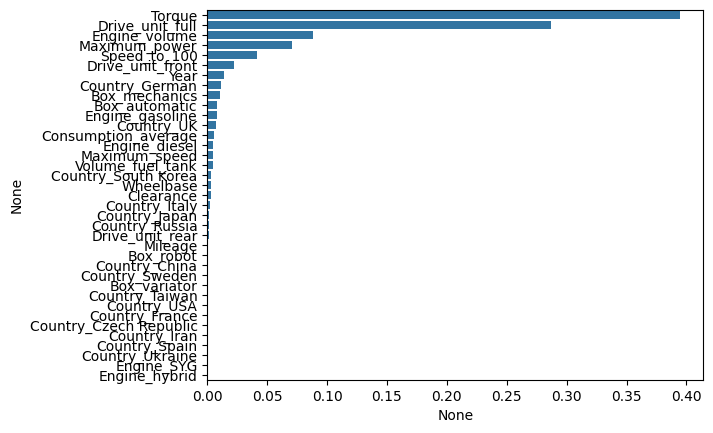

In [87]:
sns.barplot(y=importances.index, x=importances, orient="h")
pass

## 10. Выводы и результаты 1 части работы

- Была поставлена задача регрессии, которая заключалась в предсказании цены автомобиля, исходя из ряда его признаков [1](#part1)
- Для упрощения задачи из расмотрения был исключён ряд признаков [1](#part1)
- Пропущенные и некорректные значения были исключены путём удаления строк их содержащие [1](#part1)
- Были описаны оставшиеся признаки и даны их характеристики [1](#part1), [2](#part2)
- С помощью квантелей были отброшены выбросы [2](#part2)
- На основе матриц рассеивания и корреляции были сделаны некоторые выводы насчёт значимости признаков, которые позже подтвердились [2](#part2)
- Была найдена взаимосвязь между рядом признаков, что позволило исключить ещё несколько признаков [2](#part2)
- Выборка была поделена на обучающую и тестовую [3](#part3)
- Была проведена бинаризация категориальных признаков [4](#part4)
- Была проведено маштабирование количественных признаков с помощью нормализации [5](#part5)
- Были использованы методы: линейная регрессия [6](#part6), метод $k$ ближайших соседей [7](#part7), Random Forest [8](#part8) и Gradient Boosting [9](#part9)
- Для метода $k$ ближайших соседей [7](#part7) был подобран гиперпараметр кол-ва соседей
- Из всех методов лучший результат (0.985185, 0.885275), как и ожидалось, дал метод Random Forest [8](#part8)

## Часть 2 <a id="part10"></a>

## 1. Логистическая регрессия

Логистическая регрессия плохо подходит для данной задачи, поэтому пусть для неё преобразуем задачу к виду классификации машин на бюджетные, среднего класса и дорогие.

In [88]:
from sklearn.linear_model import LogisticRegression

thresholds = [0, 750000, 1500000, float('inf')]
Lr_y_test = pd.cut(y_test, bins=thresholds, labels=[0, 1, 2])
Lr_y_train = pd.cut(y_train, bins=thresholds, labels=[0, 1, 2])
#print(y_test, Lr_y_test)

In [89]:
model = LogisticRegression()
model.fit(X_train, Lr_y_train)

LogisticRegression()

In [90]:
y_train_predict = model.predict(X_train)
y_test_predict  = model.predict(X_test)
print('Accuracy of logistic regression classifier on test set: {:.2f}'.format(model.score(X_test, Lr_y_test)))
print('Accuracy of logistic regression classifier on train set: {:.2f}'.format(model.score(X_train, Lr_y_train)))

Accuracy of logistic regression classifier on test set: 0.62
Accuracy of logistic regression classifier on train set: 0.63


In [91]:
from sklearn.metrics import confusion_matrix
print(confusion_matrix(Lr_y_test, y_test_predict))
#print(confusion_matrix(Lr_y_train, y_train_predict))

[[2055   47   31]
 [ 915   81   64]
 [ 447   34  390]]


Из данной матрицы видно, что модель очень плохо определяет машины среднего класса, впрочем как и престижного класса, часто определяя их к бюджетным машинам.    
Возможно наблюдается недообучение из-за преобладания машин бюджетного класса в обучающей выборке.

## 2. Полносвязная нейроная сеть

In [92]:
from sklearn.neural_network import MLPRegressor

model = MLPRegressor(hidden_layer_sizes=(40, 20, 100))
model.fit(X_train, y_train)

c:\Users\Александр\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(


MLPRegressor(hidden_layer_sizes=(40, 20, 100))

In [93]:
y_train_predict = model.predict(X_train)
y_test_predict  = model.predict(X_test)

In [94]:
RMSE_train = mean_squared_error(y_train, y_train_predict)**.5
RMSE_test  = mean_squared_error(y_test,  y_test_predict)**.5
R2_train = r2_score(y_train, y_train_predict)
R2_test  = r2_score(y_test,  y_test_predict)

In [95]:
RMSE_table.loc['Neural Network', :] = (RMSE_train, RMSE_test)
RMSE_table

,train,test
"Linear Regression, all features",757016.43985,748854.666373
"Linear Regression, Max",809080.524029,789243.356071
k Nearest Neighbours,389214.85232,585921.927731
Random Forest,169867.186156,463902.060202
Gradient Boosting,437352.237427,525933.257887
Neural Network,945928.747738,935497.21571


In [96]:
R2_table.loc['Neural Network', :] = (R2_train, R2_test)
R2_table

,train,test
"Linear Regression, all features",0.70597,0.697512
"Linear Regression, Max",0.664136,0.664004
k Nearest Neighbours,0.922275,0.814821
Random Forest,0.985195,0.883918
Gradient Boosting,0.901861,0.850798
Neural Network,0.540911,0.52794


Результат достаточно плохой, но его можно значительно улучшить правильно подобрав параметры сети

## 3. Случайный лес (Random Forest)

Так как данный метод, как и ожидалось, показал лучший результат, то именно для него проведем подбор гиперпараметров.   
Возьмём один параметр кол-во деревьев и проварьируем его от 20 до 240 с шагом 20.

In [98]:
from sklearn.ensemble import RandomForestRegressor

n_estimators_ = 20

model = RandomForestRegressor(n_estimators=n_estimators_)
model.fit(X_train, y_train)

y_train_predict = model.predict(X_train)
y_test_predict  = model.predict(X_test)

RMSE_train = mean_squared_error(y_train, y_train_predict)**.5
RMSE_test  = mean_squared_error(y_test,  y_test_predict)**.5
R2_train = r2_score(y_train, y_train_predict)
R2_test  = r2_score(y_test,  y_test_predict)

RMSE_table_tree = pd.DataFrame(columns=('train', 'test'))
RMSE_table_tree.loc[n_estimators_, :] = (RMSE_train, RMSE_test)
print(RMSE_table_tree)

R2_table_tree = pd.DataFrame(columns=('train', 'test'))
R2_table_tree.loc[n_estimators_, :] = (R2_train, R2_test)
print(R2_table_tree)

            train           test
20  188776.386907  470076.350616
       train      test
20  0.981716  0.880807


Ячейка далее выполняется очень долго!

In [99]:
for i in range(40, 250, 20):
    n_estimators_ = i
    model = RandomForestRegressor(n_estimators=n_estimators_)
    model.fit(X_train, y_train)

    y_train_predict = model.predict(X_train)
    y_test_predict  = model.predict(X_test)

    RMSE_train = mean_squared_error(y_train, y_train_predict)**.5
    RMSE_test  = mean_squared_error(y_test,  y_test_predict)**.5
    R2_train = r2_score(y_train, y_train_predict)
    R2_test  = r2_score(y_test,  y_test_predict)

    RMSE_table_tree.loc[n_estimators_, :] = (RMSE_train, RMSE_test)

    R2_table_tree.loc[n_estimators_, :] = (R2_train, R2_test)
print(RMSE_table_tree)
print(R2_table_tree)

             train           test
20   188776.386907  470076.350616
40   176411.620268  462227.615926
60   178913.252152  464706.603031
80   172396.079911  464085.551241
100  172622.350256  464605.736643
120    171184.9366  463756.461247
140   172273.18568  461064.160722
160  169421.737783  460640.074164
180   171209.79694  462793.136096
200  170179.619629  464413.277727
220  171025.945708  463236.339704
240  171017.554896  462182.394528
        train      test
20   0.981716  0.880807
40   0.984033  0.884754
60   0.983577  0.883515
80   0.984751  0.883826
100  0.984711  0.883565
120  0.984965  0.883991
140  0.984773  0.885334
160  0.985273  0.885545
180   0.98496  0.884472
200  0.985141  0.883662
220  0.984993  0.884251
240  0.984994  0.884777


<Axes: >

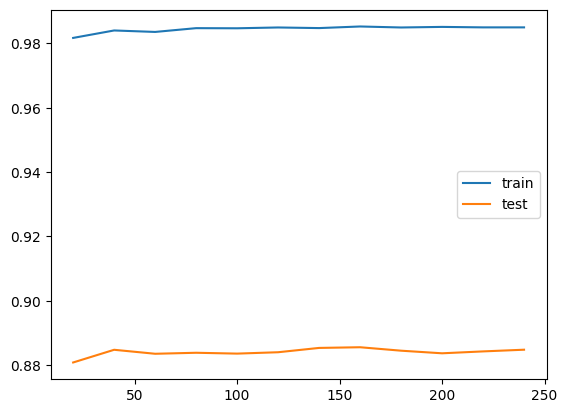

In [100]:
R2_table_tree.plot()

В целом влиянее кол-ва деревьев на результат не велико. Лучший результат при 160. Теперь зафиксируем данный параметр и проварьируем другие.   
Ячейка далее выполняется очень долго!

In [101]:
from sklearn.model_selection import GridSearchCV

param_grid = { 
    'max_features': ['sqrt', 'log2', None], 
    'max_depth': [5, 10, None], 
    'max_leaf_nodes': [5, 10, None], 
}

grid_search = GridSearchCV(RandomForestRegressor(n_estimators=160), param_grid=param_grid) 
grid_search.fit(X_train, y_train) 
print(grid_search.best_estimator_) 

RandomForestRegressor(max_features='sqrt', n_estimators=160)


Попробуем полученные параметры

In [102]:
model = RandomForestRegressor(n_estimators=160, max_features='sqrt')
model.fit(X_train, y_train)

y_train_predict = model.predict(X_train)
y_test_predict  = model.predict(X_test)

RMSE_train = mean_squared_error(y_train, y_train_predict)**.5
RMSE_test  = mean_squared_error(y_test,  y_test_predict)**.5
R2_train = r2_score(y_train, y_train_predict)
R2_test  = r2_score(y_test,  y_test_predict)

RMSE_table.loc["Random Forest Best", :] = (RMSE_train, RMSE_test)
RMSE_table

,train,test
"Linear Regression, all features",757016.43985,748854.666373
"Linear Regression, Max",809080.524029,789243.356071
k Nearest Neighbours,389214.85232,585921.927731
Random Forest,169867.186156,463902.060202
Gradient Boosting,437352.237427,525933.257887
Neural Network,945928.747738,935497.21571
Random Forest Best,171527.846091,457974.904017


In [103]:
R2_table.loc["Random Forest Best", :] = (R2_train, R2_test)
R2_table

,train,test
"Linear Regression, all features",0.70597,0.697512
"Linear Regression, Max",0.664136,0.664004
k Nearest Neighbours,0.922275,0.814821
Random Forest,0.985195,0.883918
Gradient Boosting,0.901861,0.850798
Neural Network,0.540911,0.52794
Random Forest Best,0.984904,0.886865


Результат на тесте улучшился, но всего на 0.003.

## 4. Выводы и результаты 2 части работы

- Была построена модель логистической регрессии для преобразованной задачи классификации. Была выдвинута теория о недообучении модели из-за сильной несбалансированности классов в обучающей выборке.
- Была построена модель полносвязной нейронной сети из 3 слоёв, полученный результат можно значительно улучшить правильно подобрав параметры.
- Для метода RandomForest были подобраны оптимальные гиперпараметры, но результат улучшился незначительно.